In [1]:
# Library

import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.api import OLS
from statsmodels.tsa.stattools import adfuller

warnings.filterwarnings('ignore')

In [2]:
# Original Data

data = pd.read_csv('shampo sales.csv')
data.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


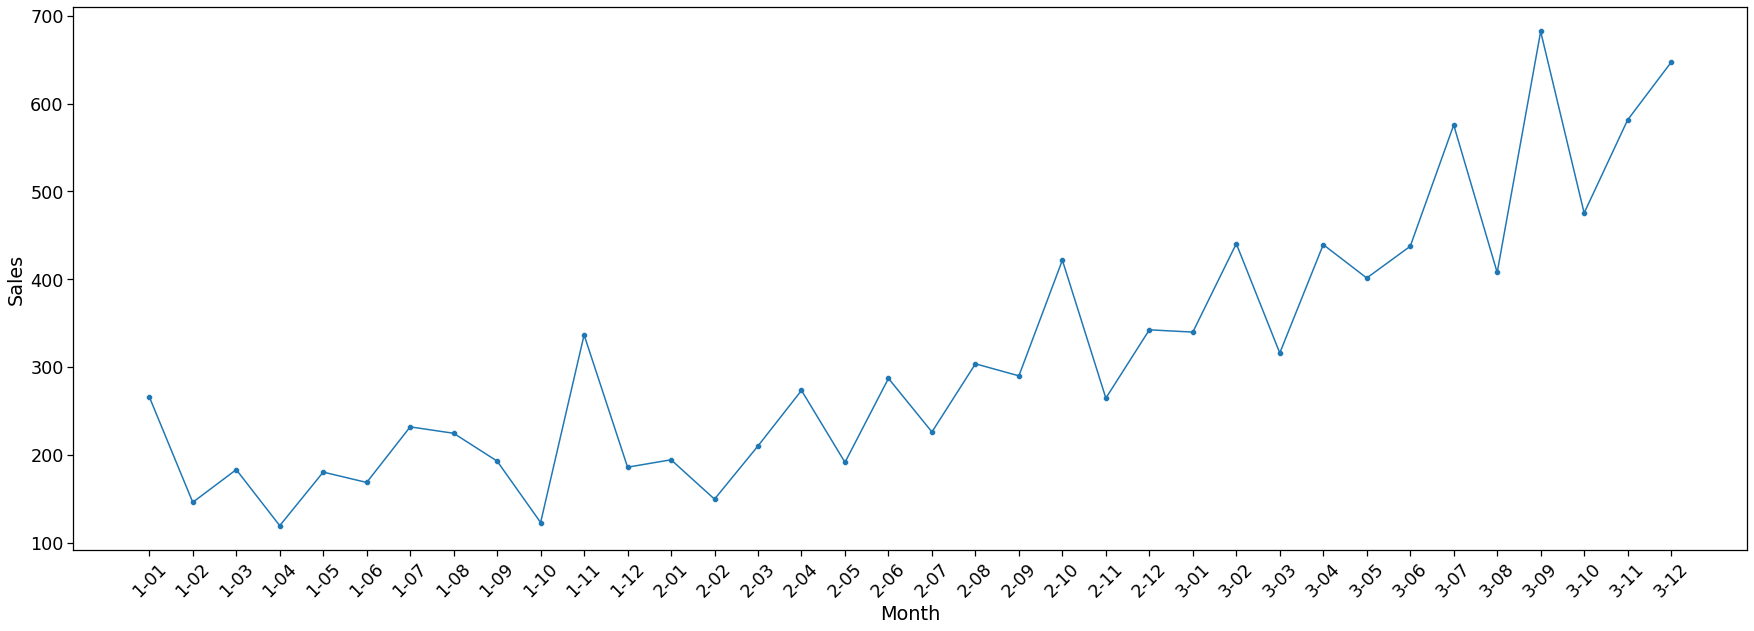

In [3]:
# Initial Plot

plt.figure(figsize = (30,10))

sns.set_context(context = 'notebook', font_scale=1.6)

sns.scatterplot(x = 'Month' , y = 'Sales', data = data)
sns.lineplot(x = 'Month', y = 'Sales', data = data)

plt.xticks(rotation=45)

plt.show()

In [4]:
# Decompose (Optional)

import plotly.graph_objects as go

url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
df = pd.read_csv(url,sep=",")

fig = go.Figure([go.Scatter(name = 'true',x=df['Date'], y=df['Consumption'])])
fig.update_xaxes(rangeslider_visible=True)
fig.show()

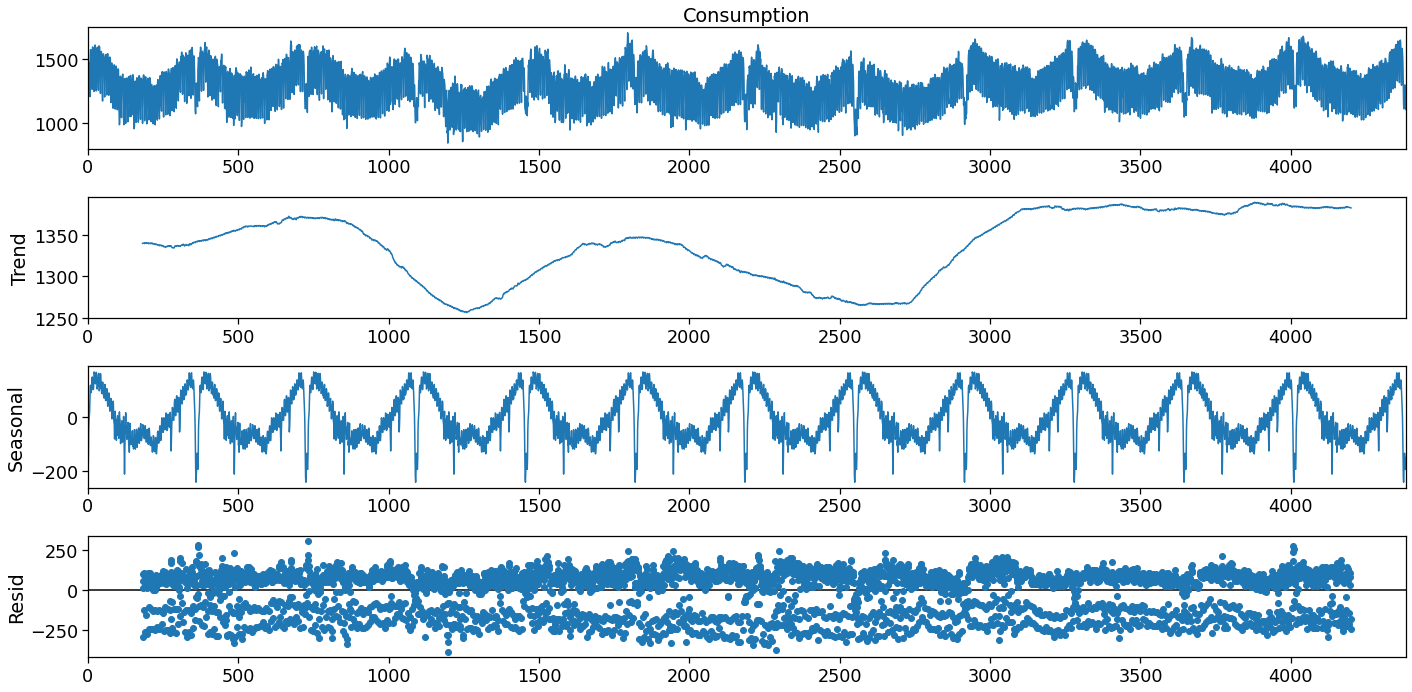

In [5]:
# Decompose (Optional)

rcParams['figure.figsize'] = 20, 10
series = df['Consumption']
result = seasonal_decompose(series, model='additive', period = 365)
result.plot()
plt.show()

In [6]:
# Stationarity

df_shampoo_stationare = data.copy() 

df_shampoo_stationare['Sales Stationary'] = df_shampoo_stationare['Sales'].diff(1)
df_shampoo_stationare['Sales Stationary 2'] = df_shampoo_stationare['Sales Stationary'].diff(1)
df_shampoo_stationare.head(15)

,Month,Sales,Sales Stationary,Sales Stationary 2
0,1-01,266.0,NaN,NaN
1,1-02,145.9,-120.1,NaN
2,1-03,183.1,37.2,-82.9
3,1-04,119.3,-63.8,-26.6
4,1-05,180.3,61.0,-2.8
5,1-06,168.5,-11.8,49.2
6,1-07,231.8,63.3,51.5
7,1-08,224.5,-7.3,56.0
8,1-09,192.8,-31.7,-39.0
9,1-10,122.9,-69.9,-101.6


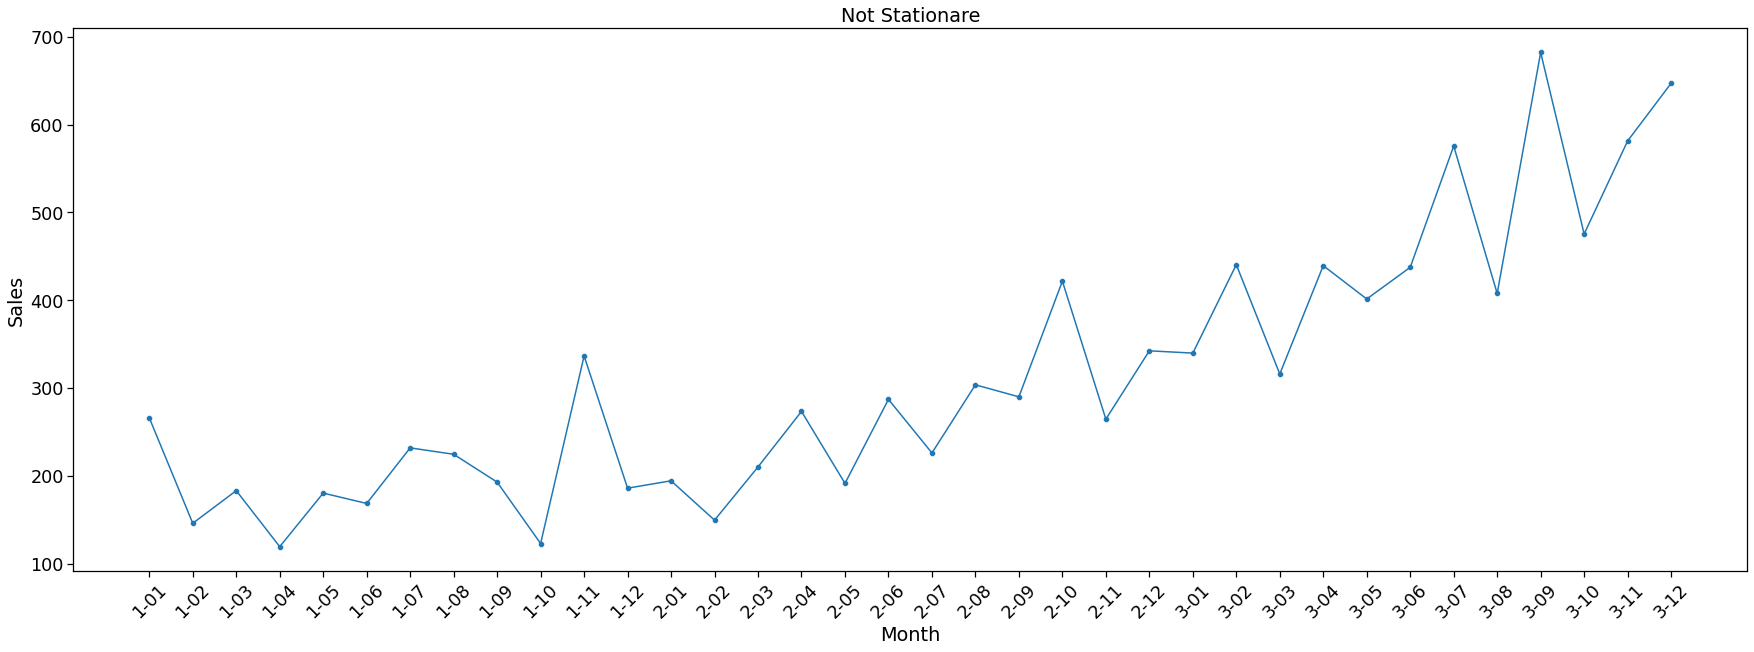

In [7]:
# Original Plot

plt.figure(figsize = (30,10))

sns.set_context(context = 'notebook', font_scale=1.6)

sns.scatterplot(x = 'Month' , y = 'Sales', data = data)
sns.lineplot(x = 'Month', y = 'Sales', data = data)

plt.title('Not Stationare')
plt.xticks(rotation=45)

plt.show()

In [8]:
# Augmented Dicky Fuller Test

ADF = adfuller (data['Sales'])
if ADF[1] > 0.05 :
    print (f'Nilai P-Value ADF Test = {ADF[1]} Sehingga Data Tidak Stasioner')
else :
    print (f'Nilai P-Value ADF Test = {ADF[1]} Sehingga Data Stasioner')

Nilai P-Value ADF Test = 1.0 Sehingga Data Tidak Stasioner


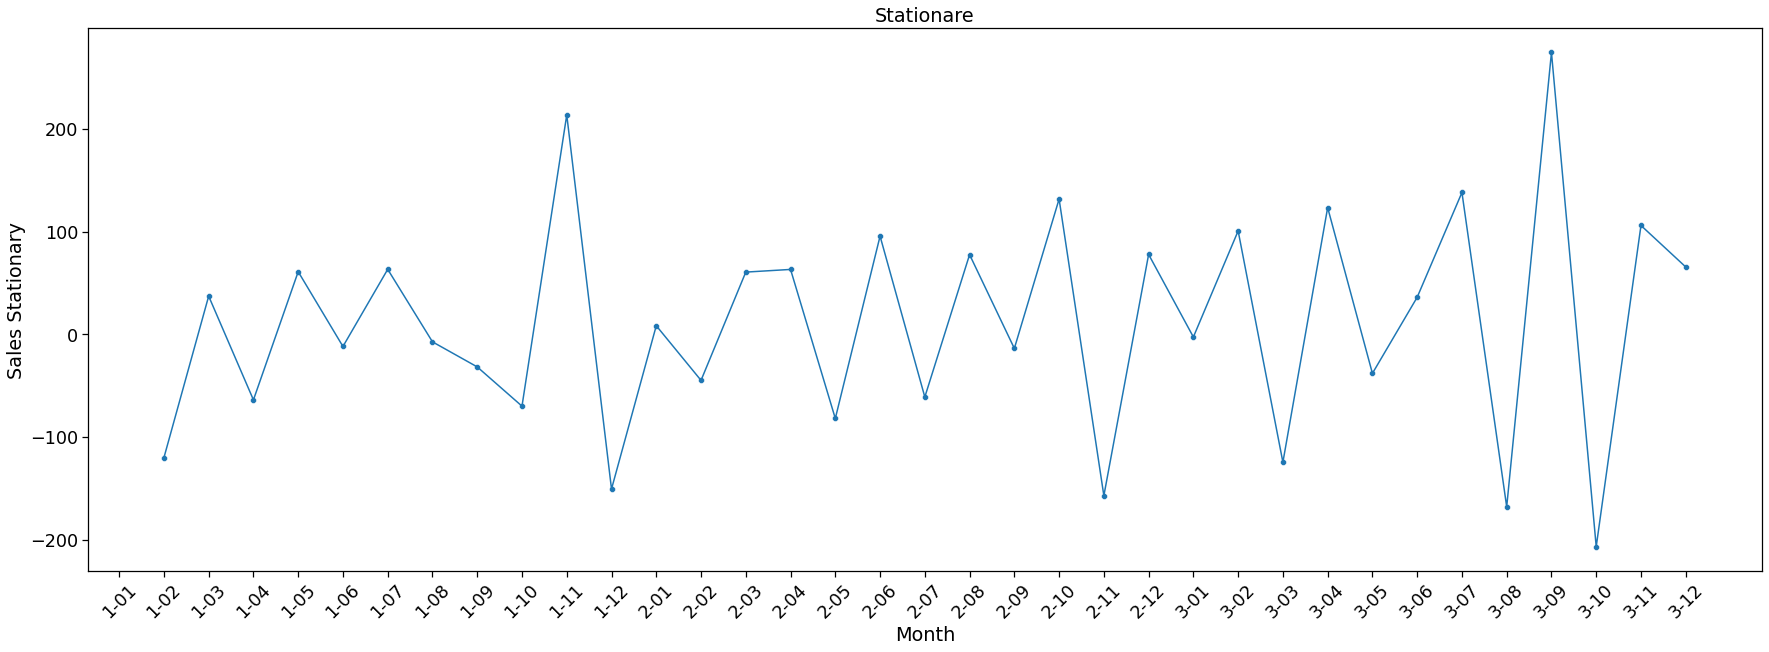

In [9]:
# Plot After Differencing

plt.figure(figsize = (30,10))

sns.set_context(context = 'notebook', font_scale=1.6)

sns.scatterplot(x = 'Month' , y = 'Sales Stationary', data = df_shampoo_stationare)
sns.lineplot(x = 'Month', y = 'Sales Stationary', data = df_shampoo_stationare)

plt.title('Stationare')
plt.xticks(rotation=45)

plt.show()

In [10]:
# AR 1

df_shampoo_ar = data.copy() 
df_shampoo_ar['lag1 Sales'] = df_shampoo_ar['Sales'].shift(1)
df_shampoo_ar.head(15)

,Month,Sales,lag1 Sales
0,1-01,266.0,NaN
1,1-02,145.9,266.0
2,1-03,183.1,145.9
3,1-04,119.3,183.1
4,1-05,180.3,119.3
5,1-06,168.5,180.3
6,1-07,231.8,168.5
7,1-08,224.5,231.8
8,1-09,192.8,224.5
9,1-10,122.9,192.8


In [11]:
# AR 2

df_shampoo_ar['lag2 Sales'] = df_shampoo_ar['Sales'].shift(2)
df_shampoo_ar.head(15)

,Month,Sales,lag1 Sales,lag2 Sales
0,1-01,266.0,NaN,NaN
1,1-02,145.9,266.0,NaN
2,1-03,183.1,145.9,266.0
3,1-04,119.3,183.1,145.9
4,1-05,180.3,119.3,183.1
5,1-06,168.5,180.3,119.3
6,1-07,231.8,168.5,180.3
7,1-08,224.5,231.8,168.5
8,1-09,192.8,224.5,231.8
9,1-10,122.9,192.8,224.5


In [12]:
# Integrated

df_shampoo_i = data.copy()
df_shampoo_i['lag1 Sales'] = df_shampoo_i['Sales'].shift(1)
df_shampoo_i['Sales Stationary'] = df_shampoo_i['Sales'] - df_shampoo_i['lag1 Sales']
df_shampoo_i['lag1 Sales Stationary'] = df_shampoo_i['Sales Stationary'].shift(1)
df_shampoo_i.head(15)

,Month,Sales,lag1 Sales,Sales Stationary,lag1 Sales Stationary
0,1-01,266.0,NaN,NaN,NaN
1,1-02,145.9,266.0,-120.1,NaN
2,1-03,183.1,145.9,37.2,-120.1
3,1-04,119.3,183.1,-63.8,37.2
4,1-05,180.3,119.3,61.0,-63.8
5,1-06,168.5,180.3,-11.8,61.0
6,1-07,231.8,168.5,63.3,-11.8
7,1-08,224.5,231.8,-7.3,63.3
8,1-09,192.8,224.5,-31.7,-7.3
9,1-10,122.9,192.8,-69.9,-31.7


In [13]:
# MA

df_shampoo_ma = data.copy()
df_shampoo_ma['et = sales - mean(sales)'] = df_shampoo_ma['Sales'] - df_shampoo_ma['Sales'].mean() 
df_shampoo_ma['lag1 et = sales - mean(sales)'] = df_shampoo_ma['et = sales - mean(sales)'].shift(1)
df_shampoo_ma.drop('et = sales - mean(sales)', axis = 1, inplace = True)

df_shampoo_ma.head(15)

,Month,Sales,lag1 et = sales - mean(sales)
0,1-01,266.0,NaN
1,1-02,145.9,-46.6
2,1-03,183.1,-166.7
3,1-04,119.3,-129.5
4,1-05,180.3,-193.3
5,1-06,168.5,-132.3
6,1-07,231.8,-144.1
7,1-08,224.5,-80.8
8,1-09,192.8,-88.1
9,1-10,122.9,-119.8


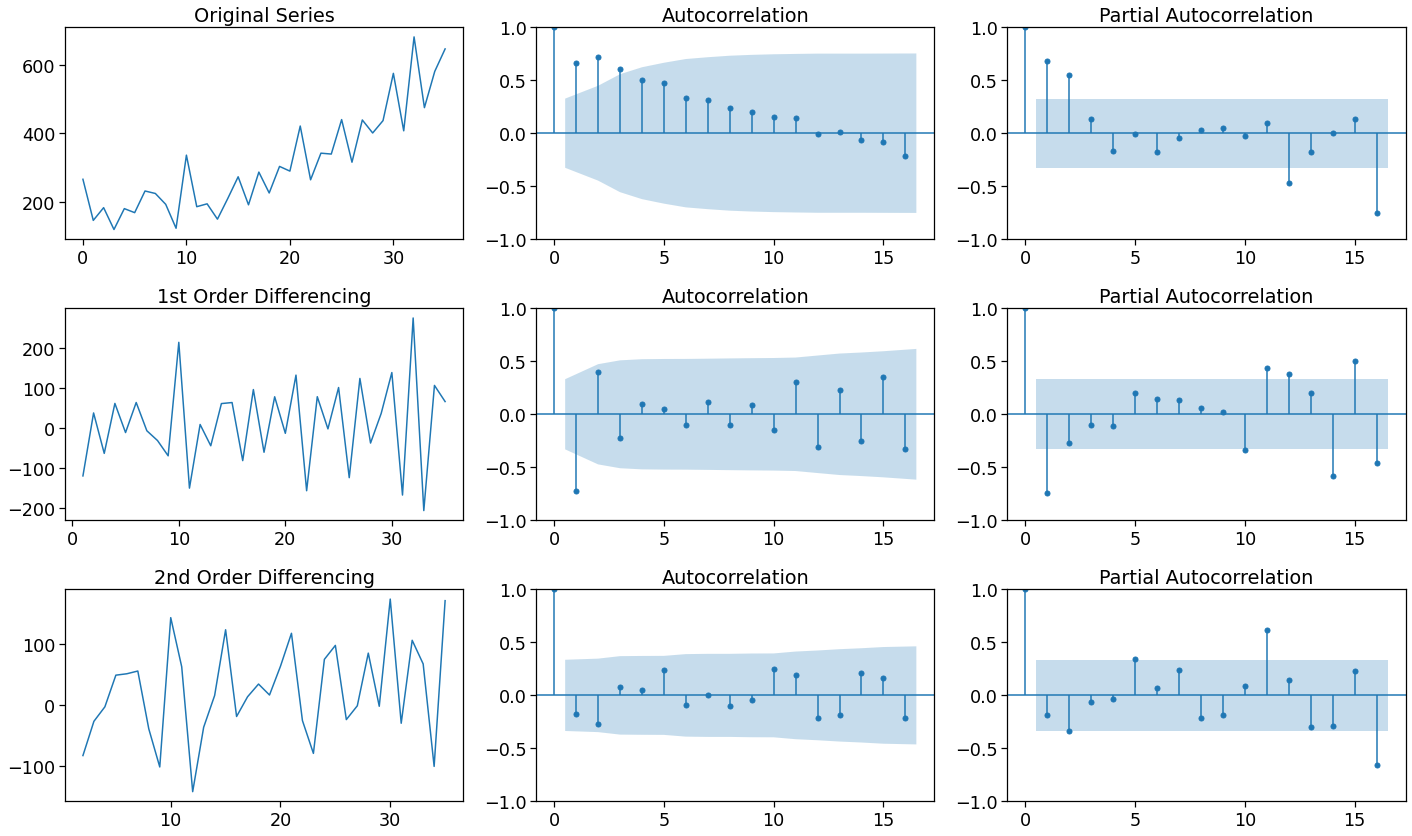

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Original Series
fig, axes = plt.subplots(3, 3, figsize = (20,12))
axes[0, 0].plot(df_shampoo_i['Sales']); axes[0, 0].set_title('Original Series')
plot_acf(df_shampoo_i['Sales'], ax=axes[0, 1])
plot_pacf(df_shampoo_i['Sales'], ax=axes[0, 2])

# 1st Differencing
axes[1, 0].plot(df_shampoo_i['Sales'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_shampoo_i['Sales'].diff().dropna(), ax=axes[1, 1])
plot_pacf(df_shampoo_i['Sales'].diff().dropna(), ax=axes[1, 2])

# 2nd Differencing
axes[2, 0].plot(df_shampoo_i['Sales'].diff(2)); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_shampoo_i['Sales'].diff(2).dropna(), ax=axes[2, 1])
plot_pacf(df_shampoo_i['Sales'].diff(2).dropna(), ax=axes[2, 2])

plt.tight_layout()
plt.show()

In [19]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['Sales'], order = (2,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -200.188
Date:                Tue, 07 Mar 2023   AIC                            406.376
Time:                        06:21:43   BIC                            411.042
Sample:                             0   HQIC                           407.987
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9139      0.225     -4.067      0.000      -1.354      -0.473
ar.L2         -0.2630      0.189     -1.392      0.164      -0.633       0.107
sigma2      5311.7175   1383.504      3.839      0.0

In [21]:
forecast_length = 6
forecast_result = model_fit.forecast(forecast_length)

In [23]:
forecast_result

36    559.074667
37    622.088320
38    587.594386
39    602.548534
40    597.952350
41    598.220507
Name: predicted_mean, dtype: float64

In [24]:
print('forecasted value',forecast_result)


forecasted value 36    559.074667
37    622.088320
38    587.594386
39    602.548534
40    597.952350
41    598.220507
Name: predicted_mean, dtype: float64


In [25]:
Month = []

for i in range(1,forecast_length+1):
  Month.append('4-'+str(i))

data.tail()

,Month,Sales
31,3-08,407.6
32,3-09,682.0
33,3-10,475.3
34,3-11,581.3
35,3-12,646.9


In [28]:
df_sales_F = pd.DataFrame({
    'Month':Month,
    'Sales':forecast_result,
})

df_sales_F = data[-1:].append(df_sales_F)
df_sales_F

,Month,Sales
35,3-12,646.900000
36,4-1,559.074667
37,4-2,622.088320
38,4-3,587.594386
39,4-4,602.548534
40,4-5,597.952350
41,4-6,598.220507


In [29]:
df_forecast = pd.DataFrame({
    'Month':Month,
    'forecast':forecast_result
})

In [30]:
fig = go.Figure([go.Scatter(name = 'true',x=data['Month'], y=data['Sales'])])
fig.add_trace(go.Scatter(name = 'forecast',x=df_sales_F['Month'], y=df_sales_F['Sales']))
fig.update_xaxes(rangeslider_visible=True)
fig.show()